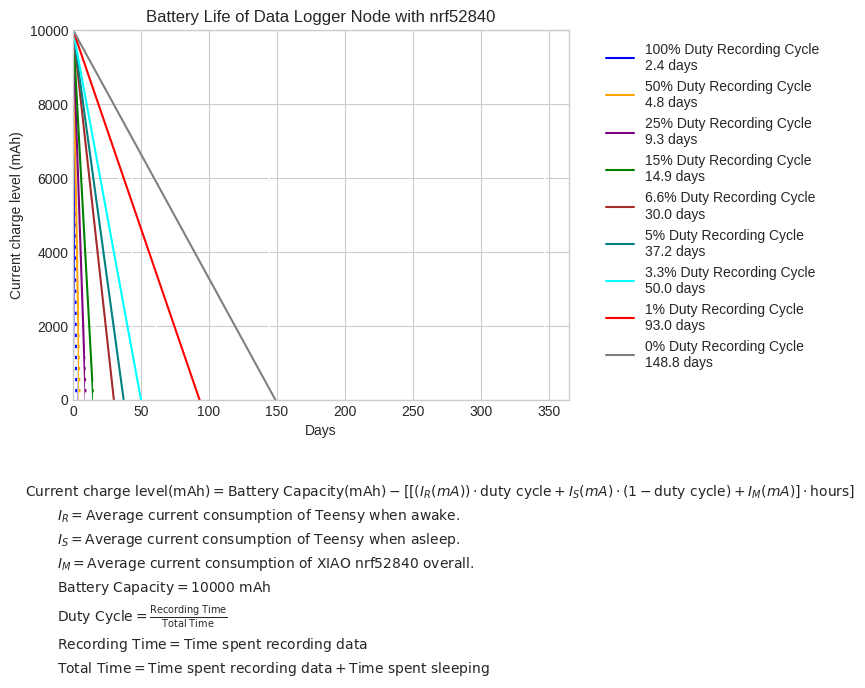

In [369]:
import matplotlib.pyplot as plt
import numpy as np

BatteryCap = 10000  # mA
I_R = 169  # Recording Current Consumption mA
I_S = 1.2  # Sleep Current Consumption mA
I_M = 1.6
Duty_Cycle0 = 0
Duty_Cycle1 = 1
Duty_Cycle2 = 0.01
Duty_Cycle3 = 0.15
Duty_Cycle4 = 0.25
Duty_Cycle5 = 0.5
Duty_Cycle6 = 0.05
Duty_Cycle7 = 0.033
Duty_Cycle8 = 0.066


def get_days(record_current, sleep_current, duty_cycle, battery_capacity):
  avg_current = ((record_current ) * duty_cycle + sleep_current * (1 - duty_cycle)) + I_M
  num = str(round((battery_capacity / avg_current) / 24, 1))
  string = num + " days"
  return string


def plot_linear_function(
    x_range=(0, 8760),
    title="Battery Life of Data Logger Node with nrf52840",
    x_label="Days",
    y_label="Current charge level (mAh)",
):


  x_hours = np.linspace(x_range[0], x_range[1], 8760)  # Generate x values in hours
  x_days = x_hours / 24

  def calculate_y(duty_cycle):
    avg_current = (I_R) * duty_cycle + I_S * (1 - duty_cycle) + I_M
    return BatteryCap - (avg_current * x_hours)

  y0 = calculate_y(Duty_Cycle0)  # Only sleep current for 0% duty cycle
  y1 = calculate_y(Duty_Cycle1)
  y2 = calculate_y(Duty_Cycle2)
  y3 = calculate_y(Duty_Cycle3)
  y4 = calculate_y(Duty_Cycle4)
  y5 = calculate_y(Duty_Cycle5)
  y6 = calculate_y(Duty_Cycle6)
  y7 = calculate_y(Duty_Cycle7)
  y8 = calculate_y(Duty_Cycle8)

  plt.figure()

  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  plt.plot(x_days, y1, label=f"100% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle1, BatteryCap)}", color="blue")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle1 + I_S * (1 - Duty_Cycle1))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y5, label=f"50% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle5, BatteryCap)}", color="orange")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle5 + I_S * (1 - Duty_Cycle5))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y4, label=f"25% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle4, BatteryCap)}", color="purple")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle4 + I_S * (1 - Duty_Cycle4))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y3, label=f"15% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle3, BatteryCap)}", color="green")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle3 + I_S * (1 - Duty_Cycle3))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y8, label=f"6.6% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle8, BatteryCap)}", color="brown")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle8 + I_S * (1 - Duty_Cycle8))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y6, label=f"5% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle6, BatteryCap)}", color="teal")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle6 + I_S * (1 - Duty_Cycle6))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y7, label=f"3.3% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle7, BatteryCap)}", color="cyan")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle7 + I_S * (1 - Duty_Cycle7))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y2, label=f"1% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle2, BatteryCap)}", color="red")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle2 + I_S * (1 - Duty_Cycle2))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y0, label=f"0% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle0, BatteryCap)}", color="grey")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle0 + I_S * (1 - Duty_Cycle0))) / 24, color="white", linestyle="--")


  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.grid(True)
  plt.figtext(0.05, -0.1,r"$\text{Current charge level(mAh)} = \text{Battery Capacity(mAh)} - \left[ \left[ (I_R(mA)) \cdot \text{duty cycle} + I_S(mA) \cdot (1 - \text{duty cycle}) + I_M(mA)\right] \cdot \text{hours}\right]$",ha="left", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.15, r"$I_R = \text{Average current consumption of Teensy when awake.}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.2, r"$I_S = \text{Average current consumption of Teensy when asleep.}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.25, r"$I_M = \text{Average current consumption of XIAO nrf52840 overall.}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.3, r"$\text{Battery Capacity} = 10000 \text{ mAh}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.37, r"$\text{Duty Cycle} = \frac{\text{Recording Time}}{\text{Total Time}}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.42, r"$\text{Recording Time} = \text{Time spent recording data}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.47, r"$\text{Total Time} = \text{Time spent recording data} + \text{Time spent sleeping}$", fontsize=10, va="bottom")
  
  plt.ylim(0, 10000)
  plt.xlim(0, 365)
  plt.show()



# Example usage:
plot_linear_function()  # Still not needed for your battery plot

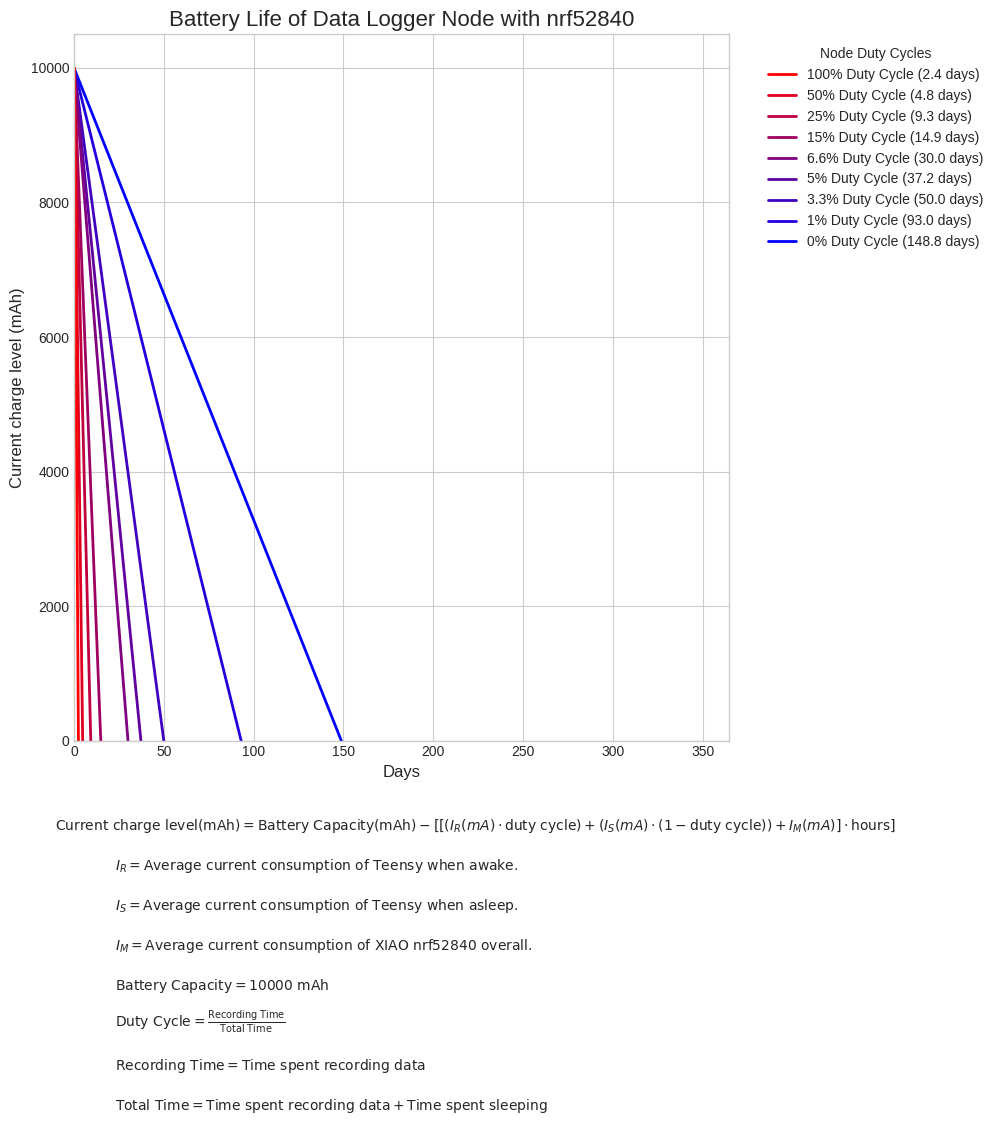

In [394]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

# --- Constants ---
BATTERY_CAPACITY = 10000  # mA
I_R = 169  # Recording Current Consumption mA
I_S = 1.2  # Sleep Current Consumption mA
I_M = 1.6  # Microcontroller Current Consumption

# --- Duty Cycles ---
# Using a dictionary to keep labels and values together
DUTY_CYCLES = {
    "100%": 1.0,
    "50%": 0.5,
    "25%": 0.25,
    "15%": 0.15,
    "6.6%": 0.066,
    "5%": 0.05,
    "3.3%": 0.033,
    "1%": 0.01,
    "0%": 0.0,
}

def get_days(record_current, sleep_current, duty_cycle, battery_capacity):
    """Calculates the battery life in days and returns a formatted string."""
    avg_current = (record_current * duty_cycle) + (sleep_current * (1 - duty_cycle)) + I_M
    if avg_current == 0:
        return "Infinite"
    days = (battery_capacity / avg_current) / 24
    return f"{round(days, 1)} days"

def plot_linear_function(
    x_range_hours=(0, 8760),
    title="Battery Life of Data Logger Node with nrf52840",
    x_label="Days",
    y_label="Current charge level (mAh)",
):
    """Plots the battery life for different duty cycles with a color gradient."""
    x_hours = np.linspace(x_range_hours[0], x_range_hours[1], 8760)
    x_days = x_hours / 24

    # Use the 'whitegrid' style for a white background
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))

    # Create a CUSTOM colormap from blue to purple to red
    num_plots = len(DUTY_CYCLES)
    custom_cmap = LinearSegmentedColormap.from_list("RedPurpleBlue", ["blue", "purple", "red"])
    colors = custom_cmap(np.linspace(0, 1, num_plots))

    # Plotting Loop
    # We iterate in reverse to map 100% to blue and 0% to red
    for i, (label, duty_cycle) in enumerate(reversed(list(DUTY_CYCLES.items()))):
        # Calculate the average current consumption
        avg_current = (I_R * duty_cycle) + (I_S * (1 - duty_cycle)) + I_M
        
        # Calculate the charge level over time
        y_charge = BATTERY_CAPACITY - (avg_current * x_hours)
        
        # Get the battery life in days to display in the legend
        days_label = get_days(I_R, I_S, duty_cycle, BATTERY_CAPACITY)
        
        # Plot the line with the color from the colormap
        plt.plot(x_days, y_charge, label=f"{label} Duty Cycle ({days_label})", color=colors[i], linewidth=2)

    # Formatting the plot
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    
    # Re-order the legend to be more intuitive (100% on top)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.04, 1), loc="upper left", title="Node Duty Cycles")
    y_start = -0.05
    y_space = 0.05
    plt.figtext(0.05, y_start,r"$\text{Current charge level(mAh)} = \text{Battery Capacity(mAh)} - \left[ \left[ (I_R(mA) \cdot \text{duty cycle}) + (I_S(mA) \cdot (1 - \text{duty cycle})) + I_M(mA)\right] \cdot \text{hours}\right]$",ha="left", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-y_space, r"$I_R = \text{Average current consumption of Teensy when awake.}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-2*y_space, r"$I_S = \text{Average current consumption of Teensy when asleep.}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-3*y_space, r"$I_M = \text{Average current consumption of XIAO nrf52840 overall.}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-4*y_space, r"$\text{Battery Capacity} = 10000 \text{ mAh}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-5*y_space, r"$\text{Duty Cycle} = \frac{\text{Recording Time}}{\text{Total Time}}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-6*y_space, r"$\text{Recording Time} = \text{Time spent recording data}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-7*y_space, r"$\text{Total Time} = \text{Time spent recording data} + \text{Time spent sleeping}$", fontsize=10, va="bottom")

    plt.ylim(0, BATTERY_CAPACITY * 1.05)
    plt.xlim(0, 365)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for legend

    plt.show()

# Run the function to generate the plot
plot_linear_function()

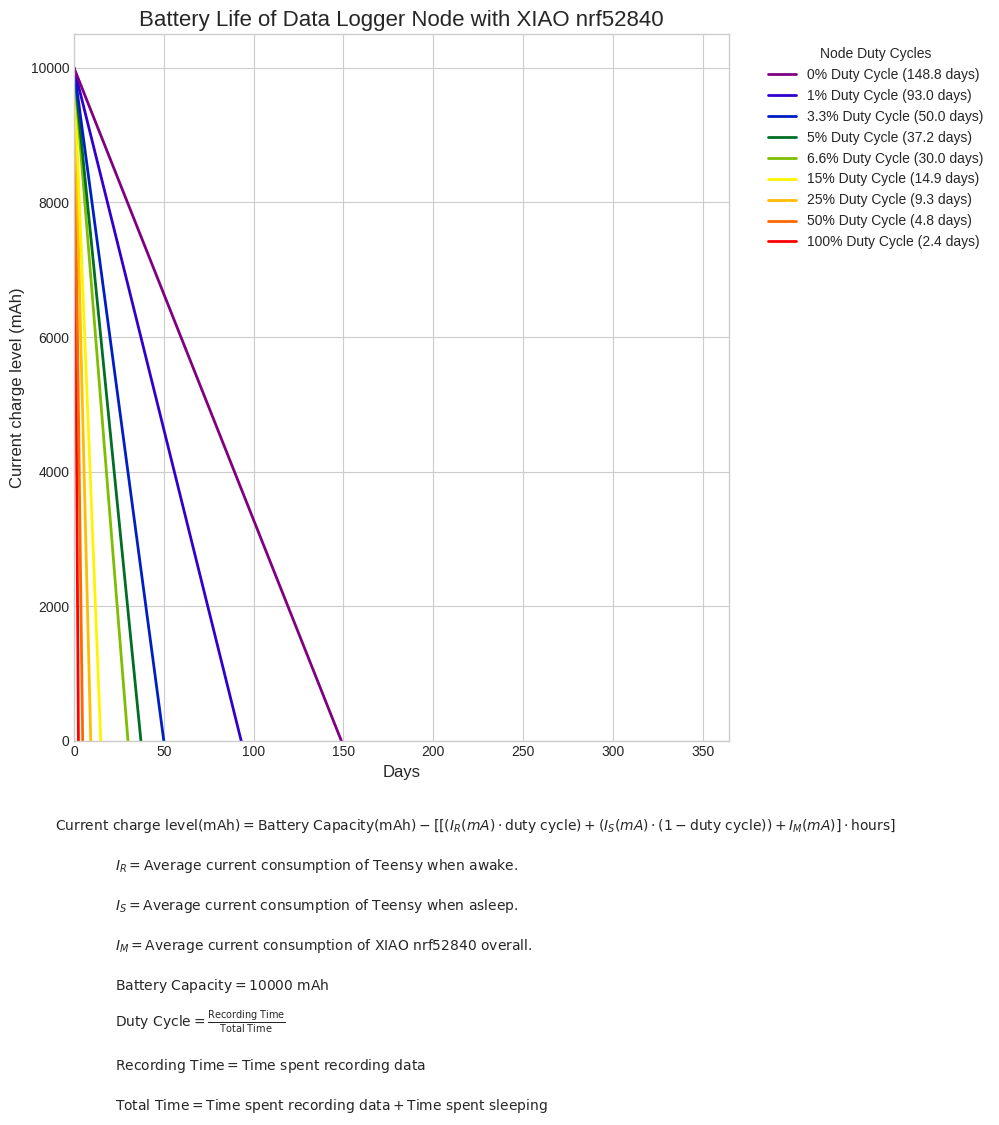

In [417]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

# --- Constants ---
BATTERY_CAPACITY = 10000  # mA
I_R = 169  # Recording Current Consumption mA
I_S = 1.2  # Sleep Current Consumption mA
I_M = 1.6  # Microcontroller Current Consumption

# --- Duty Cycles ---
# Using a dictionary to keep labels and values together
DUTY_CYCLES = {
    "100%": 1.0,
    "50%": 0.5,
    "25%": 0.25,
    "15%": 0.15,
    "6.6%": 0.066,
    "5%": 0.05,
    "3.3%": 0.033,
    "1%": 0.01,
    "0%": 0.0,
}

def get_days(record_current, sleep_current, duty_cycle, battery_capacity):
    """Calculates the battery life in days and returns a formatted string."""
    avg_current = (record_current * duty_cycle) + (sleep_current * (1 - duty_cycle)) + I_M
    if avg_current == 0:
        return "Infinite"
    days = (battery_capacity / avg_current) / 24
    return f"{round(days, 1)} days"

def plot_linear_function(
    x_range_hours=(0, 8760),
    title="Battery Life of Data Logger Node with XIAO nrf52840",
    x_label="Days",
    y_label="Current charge level (mAh)",
):
    """Plots the battery life for different duty cycles with a color gradient."""
    x_hours = np.linspace(x_range_hours[0], x_range_hours[1], 8760)
    x_days = x_hours / 24

    # Use the 'whitegrid' style for a white background
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))

    # --- Create a CUSTOM colormap based on the Pride Flag ---
    num_plots = len(DUTY_CYCLES)
    # Define the six colors of the Pride flag
    pride_colors = ["red", "orange", "yellow", "green", "blue", "purple"]
    # Create a new colormap that blends these colors
    pride_cmap = LinearSegmentedColormap.from_list("Pride", pride_colors)
    # Get a list of colors from our new map
    colors = pride_cmap(np.linspace(0, 1, num_plots))

    # Plotting Loop
    # We iterate regularly to map 0% duty cycle to Red and 100% to Purple
    for i, (label, duty_cycle) in enumerate(list(DUTY_CYCLES.items())):
        # Calculate the average current consumption
        avg_current = (I_R * duty_cycle) + (I_S * (1 - duty_cycle)) + I_M
        
        # Calculate the charge level over time
        y_charge = BATTERY_CAPACITY - (avg_current * x_hours)
        
        # Get the battery life in days to display in the legend
        days_label = get_days(I_R, I_S, duty_cycle, BATTERY_CAPACITY)
        
        # Plot the line with the color from the colormap
        plt.plot(x_days, y_charge, label=f"{label} Duty Cycle ({days_label})", color=colors[i], linewidth=2)

    # Formatting the plot
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    
    # Re-order the legend to be more intuitive (100% on top)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.04, 1), loc="upper left", title="Node Duty Cycles")

    y_start = -0.05
    y_space = 0.05
    plt.figtext(0.05, y_start,r"$\text{Current charge level(mAh)} = \text{Battery Capacity(mAh)} - \left[ \left[ (I_R(mA) \cdot \text{duty cycle}) + (I_S(mA) \cdot (1 - \text{duty cycle})) + I_M(mA)\right] \cdot \text{hours}\right]$",ha="left", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-y_space, r"$I_R = \text{Average current consumption of Teensy when awake.}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-2*y_space, r"$I_S = \text{Average current consumption of Teensy when asleep.}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-3*y_space, r"$I_M = \text{Average current consumption of XIAO nrf52840 overall.}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-4*y_space, r"$\text{Battery Capacity} = 10000 \text{ mAh}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-5*y_space, r"$\text{Duty Cycle} = \frac{\text{Recording Time}}{\text{Total Time}}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-6*y_space, r"$\text{Recording Time} = \text{Time spent recording data}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-7*y_space, r"$\text{Total Time} = \text{Time spent recording data} + \text{Time spent sleeping}$", fontsize=10, va="bottom")


    plt.ylim(0, BATTERY_CAPACITY * 1.05)
    plt.xlim(0, 365)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for legend

    plt.show()

# Run the function to generate the plot
plot_linear_function()

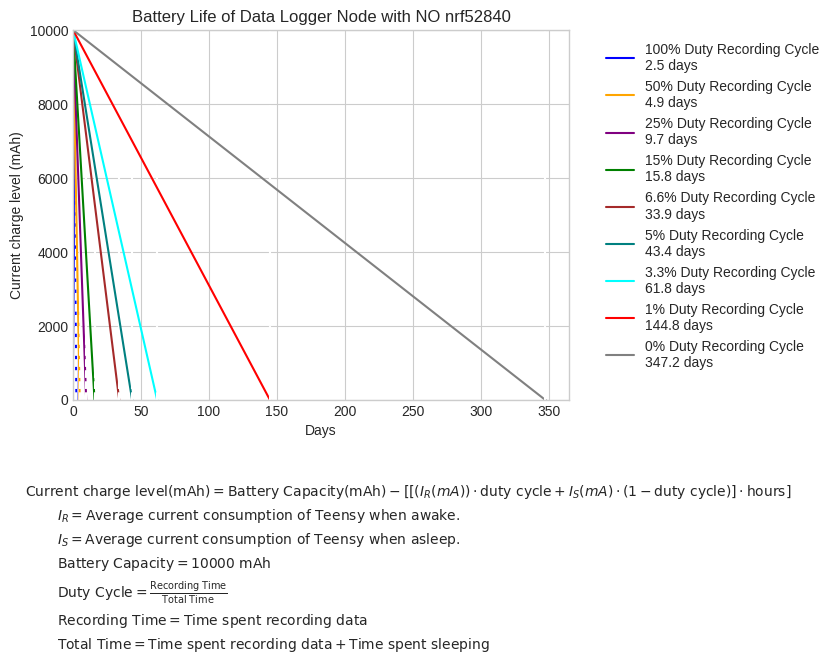

In [418]:
import matplotlib.pyplot as plt
import numpy as np

BatteryCap = 10000  # mA
I_R = 169  # Recording Current Consumption mA
I_S = 1.2  # Sleep Current Consumption mA
I_M = 0
Duty_Cycle0 = 0
Duty_Cycle1 = 1
Duty_Cycle2 = 0.01
Duty_Cycle3 = 0.15
Duty_Cycle4 = 0.25
Duty_Cycle5 = 0.5
Duty_Cycle6 = 0.05
Duty_Cycle7 = 0.033
Duty_Cycle8 = 0.066


def get_days(record_current, sleep_current, duty_cycle, battery_capacity):
  avg_current = ((record_current ) * duty_cycle + sleep_current * (1 - duty_cycle)) + I_M
  num = str(round((battery_capacity / avg_current) / 24, 1))
  string = num + " days"
  return string


def plot_linear_function(
    x_range=(0, 8760),
    title="Battery Life of Data Logger Node with NO nrf52840",
    x_label="Days",
    y_label="Current charge level (mAh)",
):


  x_hours = np.linspace(x_range[0], x_range[1], 8760)  # Generate x values in hours
  x_days = x_hours / 24

  def calculate_y(duty_cycle):
    avg_current = (I_R) * duty_cycle + I_S * (1 - duty_cycle) + I_M
    return BatteryCap - (avg_current * x_hours)

  y0 = calculate_y(Duty_Cycle0)  # Only sleep current for 0% duty cycle
  y1 = calculate_y(Duty_Cycle1)
  y2 = calculate_y(Duty_Cycle2)
  y3 = calculate_y(Duty_Cycle3)
  y4 = calculate_y(Duty_Cycle4)
  y5 = calculate_y(Duty_Cycle5)
  y6 = calculate_y(Duty_Cycle6)
  y7 = calculate_y(Duty_Cycle7)
  y8 = calculate_y(Duty_Cycle8)

  plt.figure()

  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  plt.plot(x_days, y1, label=f"100% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle1, BatteryCap)}", color="blue")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle1 + I_S * (1 - Duty_Cycle1))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y5, label=f"50% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle5, BatteryCap)}", color="orange")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle5 + I_S * (1 - Duty_Cycle5))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y4, label=f"25% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle4, BatteryCap)}", color="purple")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle4 + I_S * (1 - Duty_Cycle4))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y3, label=f"15% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle3, BatteryCap)}", color="green")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle3 + I_S * (1 - Duty_Cycle3))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y8, label=f"6.6% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle8, BatteryCap)}", color="brown")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle8 + I_S * (1 - Duty_Cycle8))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y6, label=f"5% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle6, BatteryCap)}", color="teal")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle6 + I_S * (1 - Duty_Cycle6))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y7, label=f"3.3% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle7, BatteryCap)}", color="cyan")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle7 + I_S * (1 - Duty_Cycle7))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y2, label=f"1% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle2, BatteryCap)}", color="red")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle2 + I_S * (1 - Duty_Cycle2))) / 24, color="white", linestyle="--")

  plt.plot(x_days, y0, label=f"0% Duty Recording Cycle\n{get_days(I_R, I_S, Duty_Cycle0, BatteryCap)}", color="grey")
  plt.axvline(x=(BatteryCap / ((I_R + I_M) * Duty_Cycle0 + I_S * (1 - Duty_Cycle0))) / 24, color="white", linestyle="--")


  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.grid(True)
  plt.figtext(0.05, -0.1,r"$\text{Current charge level(mAh)} = \text{Battery Capacity(mAh)} - \left[ \left[ (I_R(mA)) \cdot \text{duty cycle} + I_S(mA) \cdot (1 - \text{duty cycle})\right] \cdot \text{hours}\right]$",ha="left", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.15, r"$I_R = \text{Average current consumption of Teensy when awake.}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.2, r"$I_S = \text{Average current consumption of Teensy when asleep.}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.25, r"$\text{Battery Capacity} = 10000 \text{ mAh}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.32, r"$\text{Duty Cycle} = \frac{\text{Recording Time}}{\text{Total Time}}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.37, r"$\text{Recording Time} = \text{Time spent recording data}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.42, r"$\text{Total Time} = \text{Time spent recording data} + \text{Time spent sleeping}$", fontsize=10, va="bottom")
  
  plt.ylim(0, 10000)
  plt.xlim(0, 365)
  plt.show()



# Example usage:
plot_linear_function()  # Still not needed for your battery plot

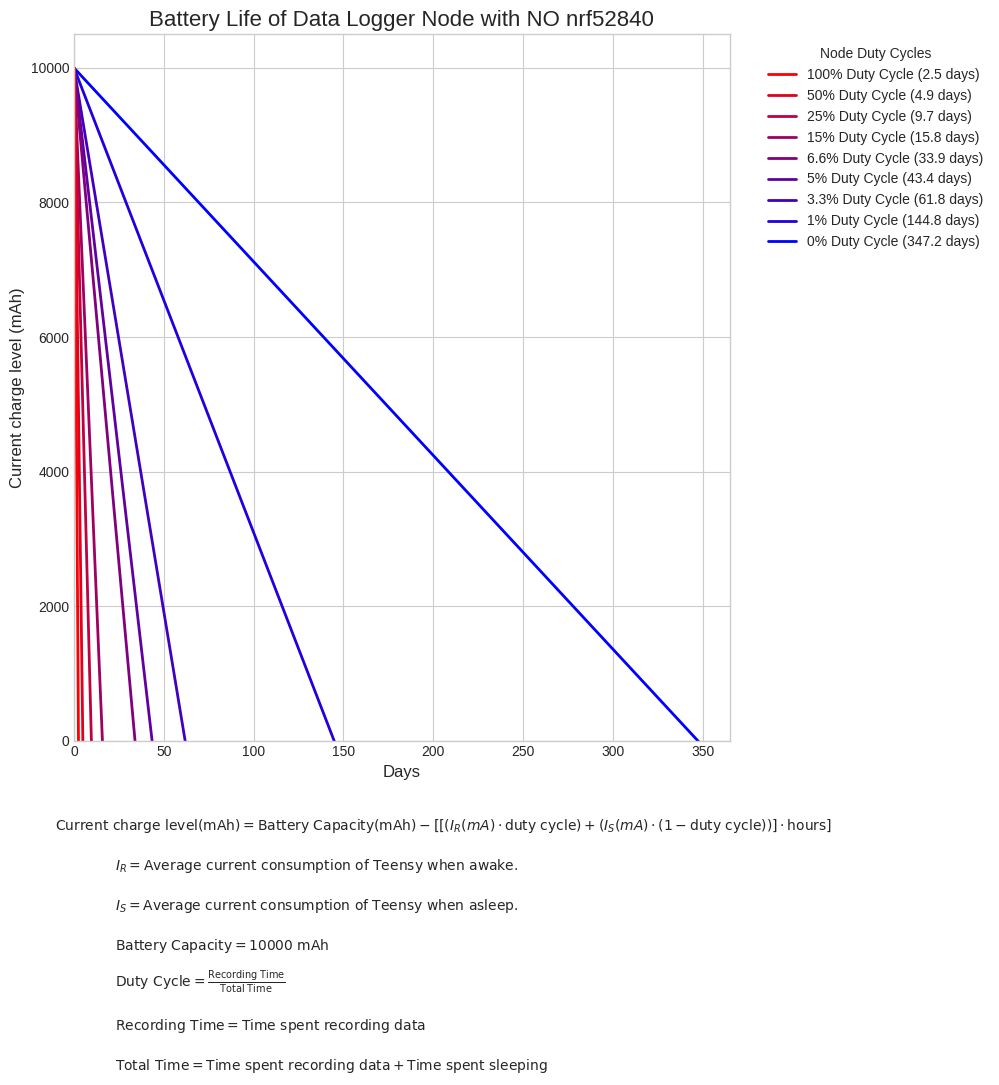

In [419]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

# --- Constants ---
BATTERY_CAPACITY = 10000  # mA
I_R = 169  # Recording Current Consumption mA
I_S = 1.2  # Sleep Current Consumption mA
I_M = 0  # Microcontroller Current Consumption

# --- Duty Cycles ---
# Using a dictionary to keep labels and values together
DUTY_CYCLES = {
    "100%": 1.0,
    "50%": 0.5,
    "25%": 0.25,
    "15%": 0.15,
    "6.6%": 0.066,
    "5%": 0.05,
    "3.3%": 0.033,
    "1%": 0.01,
    "0%": 0.0,
}

def get_days(record_current, sleep_current, duty_cycle, battery_capacity):
    """Calculates the battery life in days and returns a formatted string."""
    avg_current = (record_current * duty_cycle) + (sleep_current * (1 - duty_cycle)) + I_M
    if avg_current == 0:
        return "Infinite"
    days = (battery_capacity / avg_current) / 24
    return f"{round(days, 1)} days"

def plot_linear_function(
    x_range_hours=(0, 8760),
    title="Battery Life of Data Logger Node with NO nrf52840",
    x_label="Days",
    y_label="Current charge level (mAh)",
):
    """Plots the battery life for different duty cycles with a color gradient."""
    x_hours = np.linspace(x_range_hours[0], x_range_hours[1], 8760)
    x_days = x_hours / 24

    # Use the 'whitegrid' style for a white background
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))

    # Create a CUSTOM colormap from blue to purple to red
    num_plots = len(DUTY_CYCLES)
    custom_cmap = LinearSegmentedColormap.from_list("RedPurpleBlue", ["blue", "purple", "red"])
    colors = custom_cmap(np.linspace(0, 1, num_plots))

    # Plotting Loop
    # We iterate in reverse to map 100% to blue and 0% to red
    for i, (label, duty_cycle) in enumerate(reversed(list(DUTY_CYCLES.items()))):
        # Calculate the average current consumption
        avg_current = (I_R * duty_cycle) + (I_S * (1 - duty_cycle)) + I_M
        
        # Calculate the charge level over time
        y_charge = BATTERY_CAPACITY - (avg_current * x_hours)
        
        # Get the battery life in days to display in the legend
        days_label = get_days(I_R, I_S, duty_cycle, BATTERY_CAPACITY)
        
        # Plot the line with the color from the colormap
        plt.plot(x_days, y_charge, label=f"{label} Duty Cycle ({days_label})", color=colors[i], linewidth=2)

    # Formatting the plot
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    
    # Re-order the legend to be more intuitive (100% on top)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.04, 1), loc="upper left", title="Node Duty Cycles")
    y_start = -0.05
    y_space = 0.05
    plt.figtext(0.05, y_start,r"$\text{Current charge level(mAh)} = \text{Battery Capacity(mAh)} - \left[ \left[ (I_R(mA) \cdot \text{duty cycle}) + (I_S(mA) \cdot (1 - \text{duty cycle}))\right] \cdot \text{hours}\right]$",ha="left", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-y_space, r"$I_R = \text{Average current consumption of Teensy when awake.}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-2*y_space, r"$I_S = \text{Average current consumption of Teensy when asleep.}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-3*y_space, r"$\text{Battery Capacity} = 10000 \text{ mAh}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-4*y_space, r"$\text{Duty Cycle} = \frac{\text{Recording Time}}{\text{Total Time}}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-5*y_space, r"$\text{Recording Time} = \text{Time spent recording data}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-6*y_space, r"$\text{Total Time} = \text{Time spent recording data} + \text{Time spent sleeping}$", fontsize=10, va="bottom")

    plt.ylim(0, BATTERY_CAPACITY * 1.05)
    plt.xlim(0, 365)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for legend

    plt.show()

# Run the function to generate the plot
plot_linear_function()

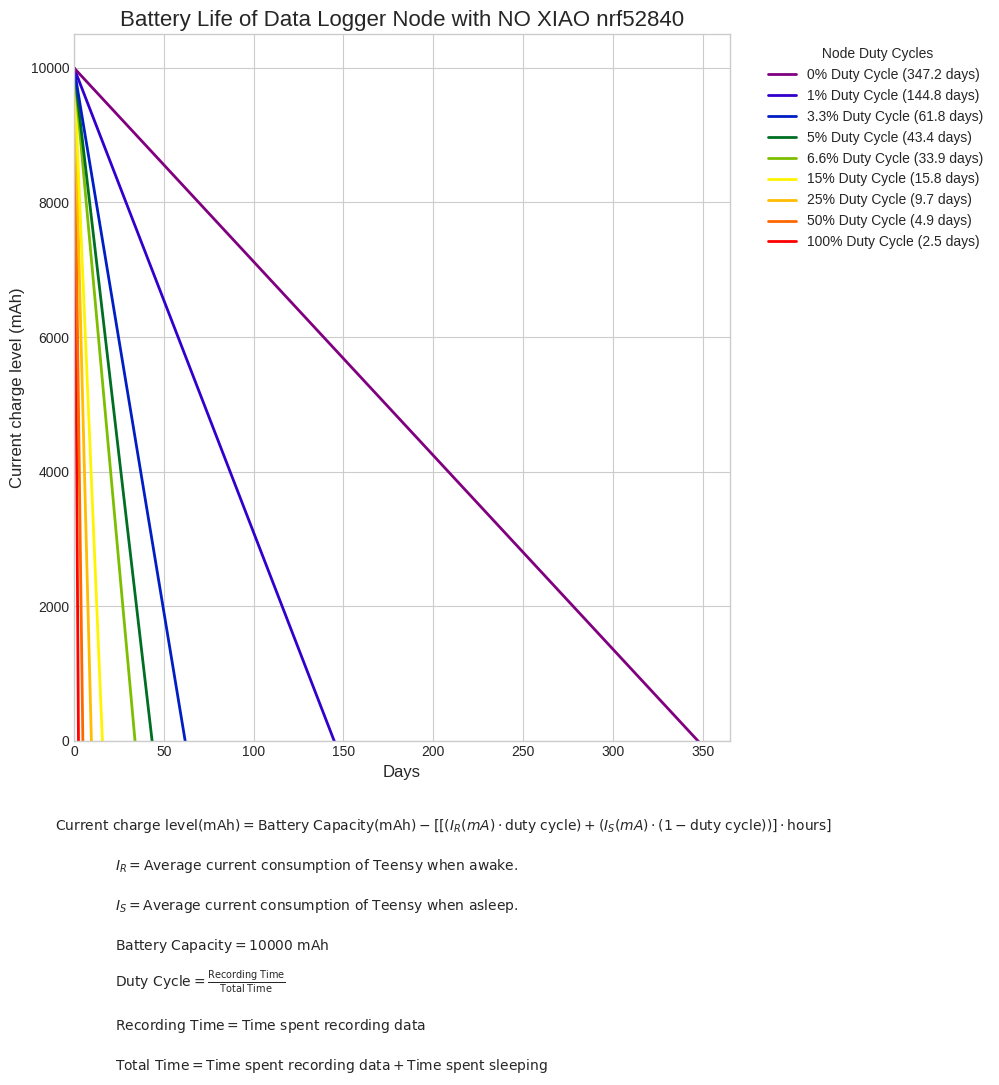

In [420]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

# --- Constants ---
BATTERY_CAPACITY = 10000  # mA
I_R = 169  # Recording Current Consumption mA
I_S = 1.2  # Sleep Current Consumption mA
I_M = 0  # Microcontroller Current Consumption

# --- Duty Cycles ---
# Using a dictionary to keep labels and values together
DUTY_CYCLES = {
    "100%": 1.0,
    "50%": 0.5,
    "25%": 0.25,
    "15%": 0.15,
    "6.6%": 0.066,
    "5%": 0.05,
    "3.3%": 0.033,
    "1%": 0.01,
    "0%": 0.0,
}

def get_days(record_current, sleep_current, duty_cycle, battery_capacity):
    """Calculates the battery life in days and returns a formatted string."""
    avg_current = (record_current * duty_cycle) + (sleep_current * (1 - duty_cycle)) + I_M
    if avg_current == 0:
        return "Infinite"
    days = (battery_capacity / avg_current) / 24
    return f"{round(days, 1)} days"

def plot_linear_function(
    x_range_hours=(0, 8760),
    title="Battery Life of Data Logger Node with NO XIAO nrf52840",
    x_label="Days",
    y_label="Current charge level (mAh)",
):
    """Plots the battery life for different duty cycles with a color gradient."""
    x_hours = np.linspace(x_range_hours[0], x_range_hours[1], 8760)
    x_days = x_hours / 24

    # Use the 'whitegrid' style for a white background
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))

    # --- Create a CUSTOM colormap based on the Pride Flag ---
    num_plots = len(DUTY_CYCLES)
    # Define the six colors of the Pride flag
    pride_colors = ["red", "orange", "yellow", "green", "blue", "purple"]
    # Create a new colormap that blends these colors
    pride_cmap = LinearSegmentedColormap.from_list("Pride", pride_colors)
    # Get a list of colors from our new map
    colors = pride_cmap(np.linspace(0, 1, num_plots))


    # Plotting Loop
    # We iterate regularly to map 0% duty cycle to Red and 100% to Purple
    for i, (label, duty_cycle) in enumerate(list(DUTY_CYCLES.items())):
        # Calculate the average current consumption
        avg_current = (I_R * duty_cycle) + (I_S * (1 - duty_cycle)) + I_M
        
        # Calculate the charge level over time
        y_charge = BATTERY_CAPACITY - (avg_current * x_hours)
        
        # Get the battery life in days to display in the legend
        days_label = get_days(I_R, I_S, duty_cycle, BATTERY_CAPACITY)
        
        # Plot the line with the color from the colormap
        # We use 'i' to index into our custom color list
        plt.plot(x_days, y_charge, label=f"{label} Duty Cycle ({days_label})", color=colors[i], linewidth=2)

    # Formatting the plot
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    
    # Re-order the legend to be more intuitive (100% on top)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.04, 1), loc="upper left", title=" Node Duty Cycles")

    y_start = -0.05
    y_space = 0.05
    plt.figtext(0.05, y_start,r"$\text{Current charge level(mAh)} = \text{Battery Capacity(mAh)} - \left[ \left[ (I_R(mA) \cdot \text{duty cycle}) + (I_S(mA) \cdot (1 - \text{duty cycle}))\right] \cdot \text{hours}\right]$",ha="left", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-y_space, r"$I_R = \text{Average current consumption of Teensy when awake.}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-2*y_space, r"$I_S = \text{Average current consumption of Teensy when asleep.}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-3*y_space, r"$\text{Battery Capacity} = 10000 \text{ mAh}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-4*y_space, r"$\text{Duty Cycle} = \frac{\text{Recording Time}}{\text{Total Time}}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-5*y_space, r"$\text{Recording Time} = \text{Time spent recording data}$", fontsize=10, va="bottom")
    plt.figtext(0.10, y_start-6*y_space, r"$\text{Total Time} = \text{Time spent recording data} + \text{Time spent sleeping}$", fontsize=10, va="bottom")


    plt.ylim(0, BATTERY_CAPACITY * 1.05)
    plt.xlim(0, 365)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for legend

    plt.show()

# Run the function to generate the plot
plot_linear_function()

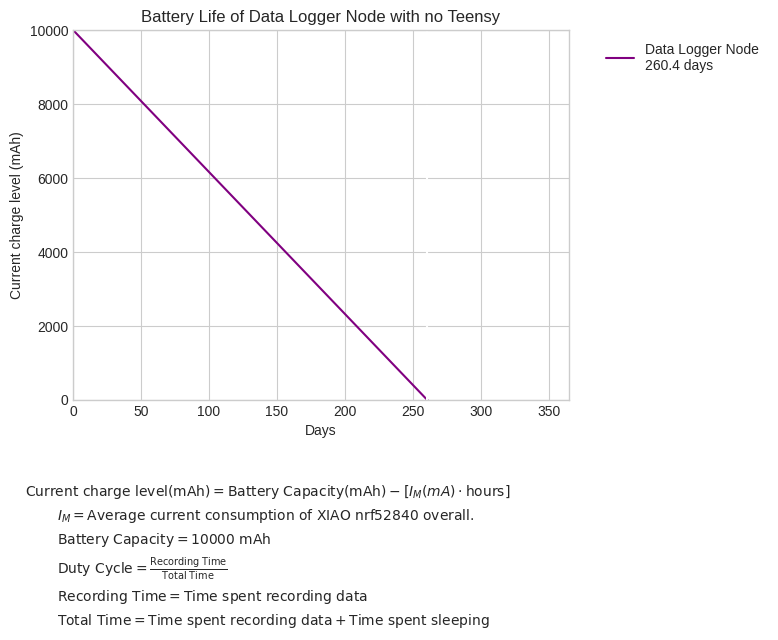

In [421]:
import matplotlib.pyplot as plt
import numpy as np

BatteryCap = 10000  # mA
I_R = 0  # Recording Current Consumption mA
I_S = 0  # Sleep Current Consumption mA
I_M = 1.6



def get_days(battery_capacity):
  avg_current =  I_M
  num = str(round((battery_capacity / avg_current) / 24, 1))
  string = num + " days"
  return string


def plot_linear_function(
    x_range=(0, 8760),
    title="Battery Life of Data Logger Node with no Teensy",
    x_label="Days",
    y_label="Current charge level (mAh)",
):


  x_hours = np.linspace(x_range[0], x_range[1], 8760)  # Generate x values in hours
  x_days = x_hours / 24

  def calculate_y():
    avg_current =  I_M
    return BatteryCap - (avg_current * x_hours)


  plt.figure()

  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  plt.plot(x_days, calculate_y(), label=f"Data Logger Node \n{get_days(BatteryCap)}", color="purple")
  plt.axvline(x=(BatteryCap / (I_M)) / 24, color="white", linestyle="--")

  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.grid(True)
 

  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.grid(True)

  plt.figtext(0.05, -0.1,r"$\text{Current charge level(mAh)} = \text{Battery Capacity(mAh)} - \left[ I_M(mA)\cdot \text{hours}\right]$",ha="left", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.15, r"$I_M = \text{Average current consumption of XIAO nrf52840 overall.}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.2, r"$\text{Battery Capacity} = 10000 \text{ mAh}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.27, r"$\text{Duty Cycle} = \frac{\text{Recording Time}}{\text{Total Time}}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.32, r"$\text{Recording Time} = \text{Time spent recording data}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.37, r"$\text{Total Time} = \text{Time spent recording data} + \text{Time spent sleeping}$", fontsize=10, va="bottom")
  plt.ylim(0, 10000)
  plt.xlim(0, 365)
  plt.show()


# Example usage:
plot_linear_function() 

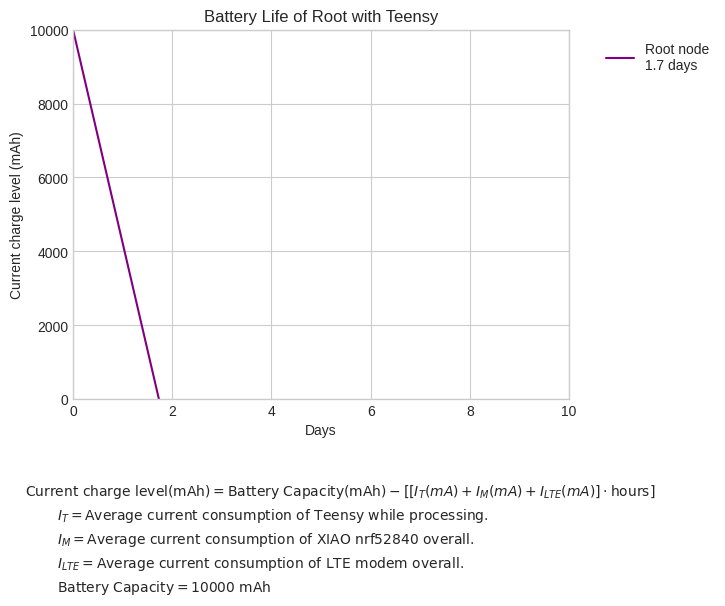

In [422]:
import matplotlib.pyplot as plt
import numpy as np

BatteryCap = 10000  # mA
I_R = 169
I_LTE= 70
I_M = 1.6

def get_days(record_current, sleep_current=0, duty_cycle=1, battery_capacity=BatteryCap):
    # Calculate average current consumption based on duty cycle
    avg_current = (record_current * duty_cycle + sleep_current * (1 - duty_cycle)) + I_M + I_LTE
    # Calculate battery life in days
    num_days = round((battery_capacity / avg_current) / 24, 1)
    return f"{num_days} days"


def plot_linear_function(
    x_range=(0, 8760),
    title="Battery Life of Root with Teensy",
    x_label="Days",
    y_label="Current charge level (mAh)",
):


  x_hours = np.linspace(x_range[0], x_range[1], 8760)  # Generate x values in hours
  x_days = x_hours / 24

  def calculate_y():
    avg_current = (I_R) + I_M + I_LTE
    return BatteryCap - (avg_current * x_hours)



  plt.figure()

  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  plt.plot(x_days, calculate_y(), label=f"Root node\n{get_days(I_R, BatteryCap)}", color="purple")
  plt.axvline(x=(BatteryCap / (I_M)) / 24, color="white", linestyle="--")

  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.grid(True)
 

  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.grid(True)

  plt.figtext(0.05, -0.1,r"$\text{Current charge level(mAh)} = \text{Battery Capacity(mAh)} - \left[\left[I_T(mA) + I_M(mA) + I_{LTE}(mA)\right]\cdot \text{hours}\right]$",ha="left", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.15, r"$I_T = \text{Average current consumption of Teensy while processing.}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.2, r"$I_M = \text{Average current consumption of XIAO nrf52840 overall.}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.25, r"$I_{LTE} = \text{Average current consumption of LTE modem overall.}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.3, r"$\text{Battery Capacity} = 10000 \text{ mAh}$", fontsize=10, va="bottom")
  plt.ylim(0, 10000)
  plt.xlim(0, 10)
  plt.show()

plot_linear_function() 


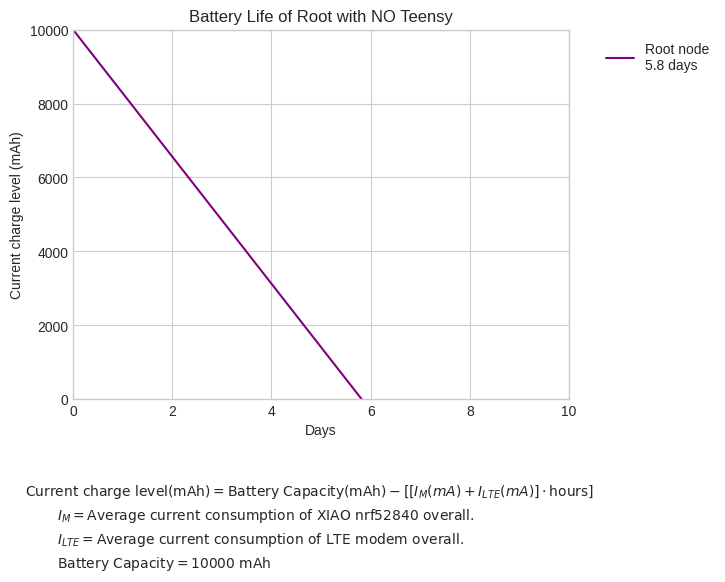

In [423]:
import matplotlib.pyplot as plt
import numpy as np

BatteryCap = 10000  # mA
I_R = 0
I_LTE= 70
I_M = 1.6

def get_days(record_current, sleep_current=0, duty_cycle=1, battery_capacity=BatteryCap):
    # Calculate average current consumption based on duty cycle
    avg_current = (record_current * duty_cycle + sleep_current * (1 - duty_cycle)) + I_M + I_LTE
    # Calculate battery life in days
    num_days = round((battery_capacity / avg_current) / 24, 1)
    return f"{num_days} days"

def plot_linear_function(
    x_range=(0, 8760),
    title="Battery Life of Root with NO Teensy",
    x_label="Days",
    y_label="Current charge level (mAh)",
):


  x_hours = np.linspace(x_range[0], x_range[1], 8760)  # Generate x values in hours
  x_days = x_hours / 24

  def calculate_y():
    avg_current = (I_R) + I_M + I_LTE
    return BatteryCap - (avg_current * x_hours)



  plt.figure()

  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  plt.plot(x_days, calculate_y(), label=f"Root node\n{get_days(I_R, BatteryCap)}", color="purple")
  plt.axvline(x=(BatteryCap / (I_M)) / 24, color="white", linestyle="--")

  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.grid(True)
 

  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.grid(True)

  plt.figtext(0.05, -0.1,r"$\text{Current charge level(mAh)} = \text{Battery Capacity(mAh)} - \left[ \left[I_M(mA) + I_{LTE}(mA)\right]\cdot \text{hours}\right]$",ha="left", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.15, r"$I_M = \text{Average current consumption of XIAO nrf52840 overall.}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.20, r"$I_{LTE} = \text{Average current consumption of LTE modem overall.}$", fontsize=10, va="bottom")
  plt.figtext(0.10, -0.25, r"$\text{Battery Capacity} = 10000 \text{ mAh}$", fontsize=10, va="bottom")
  plt.ylim(0, 10000)
  plt.xlim(0, 10)
  plt.show()

plot_linear_function() 
